# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [23]:
df_test.shape

(14910, 53)

In [22]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [21]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [16]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [17]:
df = df_test.append(df_train).reset_index(drop=True)

In [24]:
df.shape

(30133, 53)

In [68]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132
AGREEMENT_RK,59909969,59910420,59911223,59911322,59911438,59911769,59912044,59912382,59912422,59912485,...,75290347,75290611,75290704,75291177,75291338,75291424,75291888,75291923,75291960,75292242
TARGET,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
AGE,30,48,35,22,27,44,57,33,53,33,...,36,31,35,61,39,25,51,22,60,37
SOCSTATUS_WORK_FL,1,0,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
SOCSTATUS_PENS_FL,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
GENDER,1,1,0,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,0
CHILD_TOTAL,1,0,1,0,2,2,0,2,2,1,...,0,1,1,0,1,1,2,1,2,2
DEPENDANTS,1,0,0,0,2,2,0,2,0,0,...,0,1,1,0,1,1,0,1,0,0
EDUCATION,Среднее специальное,Среднее,Среднее,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее специальное,Неполное среднее,...,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее,Среднее
MARITAL_STATUS,Не состоял в браке,Состою в браке,Не состоял в браке,Не состоял в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Состою в браке,Состою в браке,...,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Вдовец/Вдова,Состою в браке


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [168]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Среднее специальное', 'Среднее', 'Ученая степень', 'Неполное среднее', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Состою в браке', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Развлечения/Искусство', 'Управляющая компания', 'Туризм', 'Маркетинг', 'Энергетика', 'Строительство', 'Информационные технологии', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Металлургия/Промышленность/Машиностроение', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость', 'Салоны красоты и здоровья', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Юридические услуги/нотариальные услуги', 'Торговля', 'Наука', 'Логистика', 'Подбор персонала', 'Информационные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [99]:
for i in df.columns: # перебираем все столбцы
    if str(df['PERSONAL_INCOME'].dtype) == 'object': # если тип столбца - object
        df['PERSONAL_INCOME']=df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [38]:
df['CREDIT']=df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
GEN_INDUSTRY 27420 non-null object - отрасль работы клиента- пропуски заменить на "Другое".
GEN_TITLE 27420 non-null object - должность - пропуски заменить на "Другое"
ORG_TP_STATE 27420 non-null object - форма собственности компании - пропуски заменить на "Другое"
ORG_TP_FCAPITAL 27425 non-null object - отношение к иностранному капиталу - пропуски заменить на "Другое"
JOB_DIR 27420 non-null object - направление деятельности в нутри компании - пропуски заменить на "Другое"
TP_PROVINCE 29543 non-null object - область торговой точки, где клиент брал последний кредит - пропуски заменить на "Другое"
WORK_TIME 27416 non-null float64 - время работы на текущем месте (в месяцах) - пропуски заменить на среднее значение
PREVIOUS_CARD_NUM_UTILIZED 600 non-null float64 - количество уже утилизированных карт ( если пусто - 0) -  пропуски заменить на "0"

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Категориальные признаки имеются. К текстовым применим метод

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [289]:
def preproc_data(df_input):
    df_output = df_input.copy()
    #Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    #Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    for i in df_output.columns: # перебираем все столбцы
        if str(df_output['PERSONAL_INCOME'].dtype) == 'object':
            df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
        if str(df_output['CREDIT'].dtype) == 'object':
            df_output['CREDIT']          = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
        if str(df_output['FST_PAYMENT'].dtype) == 'object':
            df_output['FST_PAYMENT']      = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
        if str(df_output['LOAN_AVG_DLQ_AMT'].dtype) == 'object':
            df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
        if str(df_output['LOAN_MAX_DLQ_AMT'].dtype) == 'object': # если тип столбца - objec
            df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float') 
    #PREVIOUS_CARD_NUM_UTILIZED количество уже утилизированных карт ( если пусто - 0) 
    df_output['PREVIOUS_CARD_NUM_UTILIZED'][df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]=0
    #время работы на текущем месте (в месяцах) пустые значения заполняем средним значением.
    df_output['WORK_TIME'][df_output['WORK_TIME'].isnull()]=df_output['WORK_TIME'].mean()
    # Заполняем все остальные пропуски в значениях
    
    df_output['GEN_INDUSTRY'][df_output['GEN_INDUSTRY'].isnull()]='GEN_INDUSTRY_0'
    df_output['GEN_TITLE'][df_output['GEN_TITLE'].isnull()]='GEN_TITLE_0'
    df_output['ORG_TP_STATE'][df_output['ORG_TP_STATE'].isnull()]='ORG_TP_STATE_0'
    df_output['ORG_TP_FCAPITAL'][df_output['ORG_TP_FCAPITAL'].isnull()]='ORG_TP_FCAPITAL_0'
    df_output['JOB_DIR'][df_output['JOB_DIR'].isnull()]='JOB_DIR_0'
    df_output['TP_PROVINCE'][df_output['TP_PROVINCE'].isnull()]='TP_PROVINC_0'
    df_output['REGION_NM'][df_output['REGION_NM'].isnull()]='REGION_N_0'
    
    ## Кодировка категориальных признаков
    df_output = pd.get_dummies(df_output, 
                               columns=['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE',
                                        'ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME',
                                        'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE',
                                        'TP_PROVINCE','REGION_NM'])
    #Удаляю пустые столбцы
    df_output = df_output.drop(['GEN_INDUSTRY_GEN_INDUSTRY_0'], axis=1)
    df_output = df_output.drop(['GEN_TITLE_GEN_TITLE_0'], axis=1)
    df_output = df_output.drop(['ORG_TP_STATE_ORG_TP_STATE_0'], axis=1)
    df_output = df_output.drop(['ORG_TP_FCAPITAL_ORG_TP_FCAPITAL_0'], axis=1)
    df_output = df_output.drop(['JOB_DIR_JOB_DIR_0'], axis=1)
    df_output = df_output.drop(['TP_PROVINCE_TP_PROVINC_0'], axis=1)
    df_output = df_output.drop(['REGION_NM_REGION_N_0'], axis=1)
    return df_output

In [290]:
df_preproc = df.pipe(preproc_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [291]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 444 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(405)
memory usage: 20.6+ MB


In [292]:
for i in df_preproc.columns: # перебираем все столбцы
    if str(df_preproc[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_preproc[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

sample
{'test', 'train'}




In [293]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 444 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(405)
memory usage: 20.6+ MB


In [294]:
#df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [295]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.2 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [296]:
Y_train_preproc = df_train_preproc['TARGET']
X_train_preproc = df_train_preproc.drop(['TARGET'], axis=1)

Y_test_preproc = df_test_preproc['TARGET']
X_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)

In [297]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.2 MB


#### Задание 5. Обучение и оценка качества разных моделей

In [298]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X_train_preproc, Y_train_preproc, test_size=0.33, random_state=42)


In [299]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [305]:
#+++++++++++++DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)

In [301]:
#++++++++++++++++++RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc = rfc.predict_proba(X_test)

In [302]:
#++++++++++++++++++LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)

In [303]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [306]:
print('accuracy', accuracy_score(y_test,predict_dtc))# в процентах совпадения точность, доля верных ответов
print('precision', precision_score(y_test,predict_dtc)) # Расчет точности
print('recall', recall_score(y_test,predict_dtc))# Расчет полноты

accuracy 0.789211783439
precision 0.162406015038
recall 0.177049180328


In [286]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy', accuracy_score(y_test,predict_rfc))# в процентах совпадения точность, доля верных ответов
print('precision', precision_score(y_test,predict_rfc)) # Расчет точности
print('recall', recall_score(y_test,predict_rfc))# Расчет полноты

accuracy 0.876393312102
precision 0.210526315789
recall 0.00655737704918


In [287]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy', accuracy_score(y_test,predict_lr))# в процентах совпадения точность, доля верных ответов
print('precision', precision_score(y_test,predict_lr)) # Расчет точности
print('recall', recall_score(y_test,predict_lr))# Расчет полноты

accuracy 0.878383757962
precision 0.4
recall 0.00327868852459


In [272]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
from sklearn.metrics import precision_recall_curve # Расчет полноты и точности при сдвижении порога точности

In [307]:
precision_dtc,recall_dtc,thresholds_dtc = precision_recall_curve(y_test,predict_proba_dtc[:,1])
precision_rfc,recall_rfc,thresholds_rfc = precision_recall_curve(y_test,predict_proba_rfc[:,1])
precision_lr,recall_lr,thresholds_lr = precision_recall_curve(y_test,predict_proba_lr[:,1])

(-0.01, 1.01)

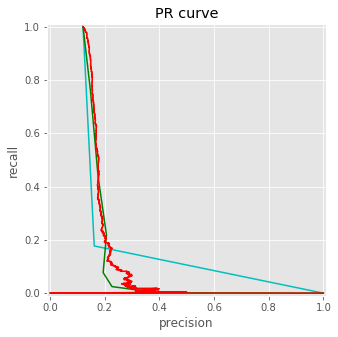

In [310]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc,recall_dtc,'c')
plt.plot(precision_rfc,recall_rfc,'g')
plt.plot(precision_lr,recall_lr,'r')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here

(-0.01, 1.01)

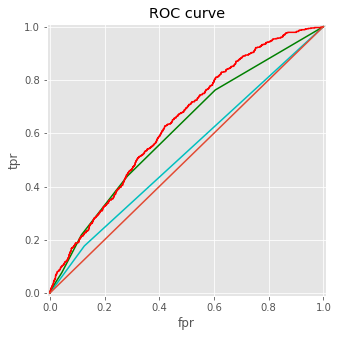

In [309]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test,predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test,predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,predict_proba_lr[:,1])


plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc,'c')
plt.plot(fpr_rfc, tpr_rfc,'g')
plt.plot(fpr_lr, tpr_lr,'r')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [320]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [333]:
d_dtc = cross_val_score(
    dtc,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv=cv
)
d_dtc.mean()

0.52586474667582972

In [330]:
d_rfc = cross_val_score(
    rfc,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv=cv
)
d_rfc.mean()

0.59466800325017777

In [331]:
d_lr = cross_val_score(
    lr,
    X_train_preproc,
    Y_train_preproc,
    scoring = 'roc_auc',
    cv=cv
)

In [328]:
d_lr.mean()

0.64558955402916207

In [338]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

lr_predict = lr.predict_proba(X_test_preproc)
## Your Code Here

In [342]:
lr_predict[:,1]

array([ 0.16758527,  0.0538221 ,  0.17686414, ...,  0.18862492,
        0.04093761,  0.1868477 ])

In [343]:
# Померить roc_auc на тесте
roc_auc_score(Y_test_preproc,lr_predict[:,1])# Площадь под кривой

0.62104702561875813

In [344]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test_preproc,lr_predict[:,1])#Для графика

(-0.01, 1.01)

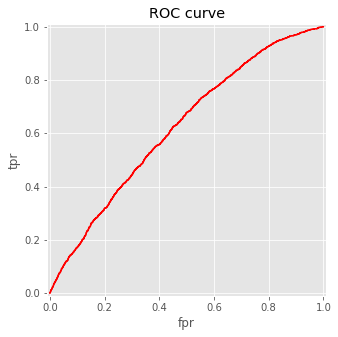

In [346]:
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr,'r')
#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))